In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5728, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.isnull().sum()

,0
text,0
spam,0


In [ ]:
df.duplicated().sum()

np.int64(33)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['spam'].value_counts()

,count
spam,
0,4327
1,1368


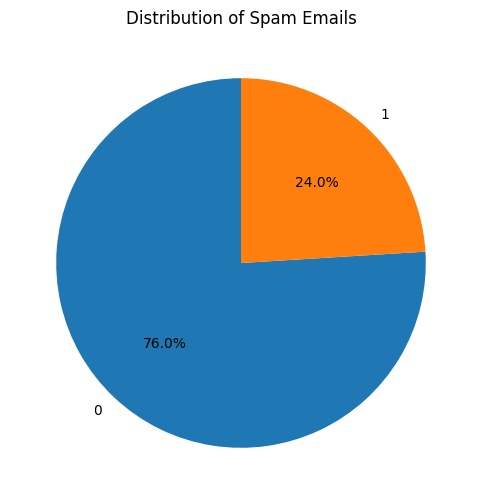

In [ ]:
spam_counts = df['spam'].value_counts()
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam Emails')
plt.show()

In [ ]:
x = df.text.values
y = df.spam.values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Accuracy: 0.9253731343283582


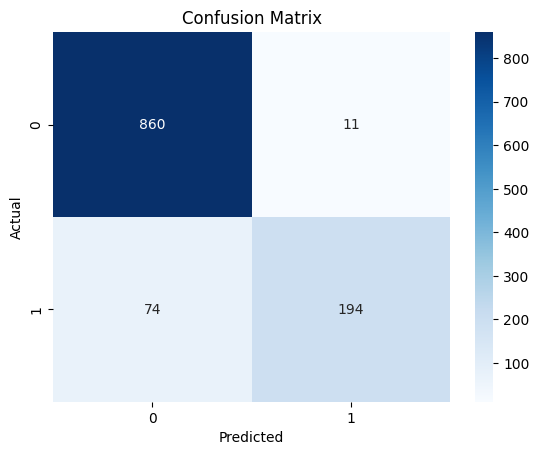

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)
x_test = cv.transform(xtest)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(x_train, ytrain)

y_pred = knn.predict(x_test)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9868305531167691


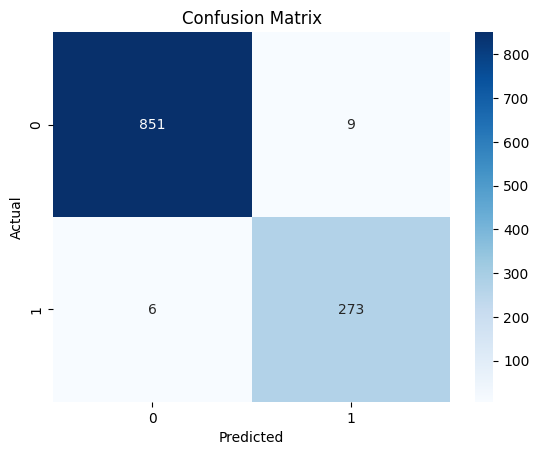

In [ ]:
#x = df.text.values
#y = df.spam.values
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

 #2. Create and fit the CountVectorizer
#cv = CountVectorizer()
#x_train = cv.fit_transform(xtrain) # Fit and transform on training data
#x_test = cv.transform(xtest) # Only transform on testing data


# 3. Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(x_train, ytrain)

# 4. Predictions and Evaluation
y_pred = model.predict(x_test)

# Accuracy
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from ast import mod
model = MultinomialNB()
model.fit(x_train, ytrain)

MultinomialNB()

Accuracy: 0.9920983318700615


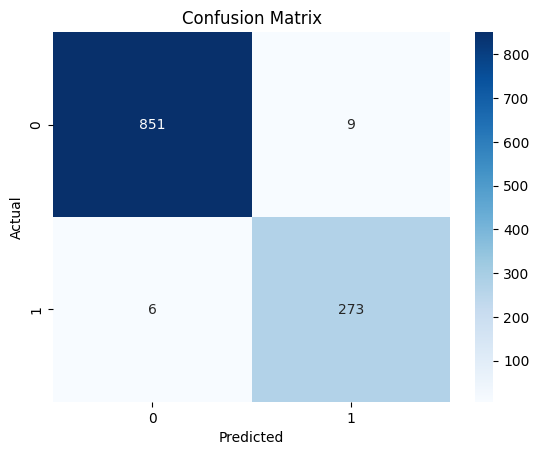

In [ ]:
y_pred = model.predict(x_test)  # Get predictions from the model
accuracy = accuracy_score(ytest, y_pred) # Compare predictions with true labels
print("Accuracy:", accuracy)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
emails = ['Congratulations! You’ve won a million dollars. Just send us your credit card details to claim your prize.']
cv_emails = cv.transform(emails)
model.predict(cv_emails)

array([1])